In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from PIL import Image

In [ ]:
# Importing data
METADATA_FILE = os.getenv("METADATA_FILE")
metadata = pd.read_csv(METADATA_FILE)

In [15]:
# Cleaning data
metadata.drop(columns=["Label_2_Virus_category", "Label_1_Virus_category", "Unnamed: 0"], inplace= True)

In [17]:
metadata["Label"].unique()

array(['Normal', 'Pnemonia'], dtype=object)

### Visualizing images

In [17]:
load_dotenv()
normal = "Normal"
pneu = "Pnemonia"
TRAIN_PATH = os.getenv('ORG_TRAIN_DIR')
TEST_PATH = os.getenv('ORG_TEST_DIR')

TEST_NORMAL_PATH = os.path.join(TEST_PATH, "Normal")
TEST_PNE_PATH = os.path.join(TEST_PATH, "Pnemonia")
TRAIN_NORMAL_PATH = os.path.join(TRAIN_PATH, "Normal")
TRAIN_PNE_PATH = os.path.join(TRAIN_PATH, "Pnemonia")


In [45]:
test_norm_img = [f for f in os.listdir(TEST_NORMAL_PATH) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
test_pne_img = [f for f in os.listdir(TEST_PNE_PATH) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
train_norm_img = [f for f in os.listdir(TRAIN_NORMAL_PATH) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
train_pne_img = [f for f in os.listdir(TRAIN_PNE_PATH) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

In [21]:
def show_image(image_name, path_to_image):

    cols = 4
    rows = (16 + cols - 1) // cols

    num_images = min(16, len(image_name))

    plt.figure(figsize=(12, 12))
    for i, img_file in enumerate(image_name[:num_images]):
        img_path = os.path.join(path_to_image, img_file)
        img = Image.open(img_path)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_file, fontsize=8)

    plt.tight_layout()
    plt.show()

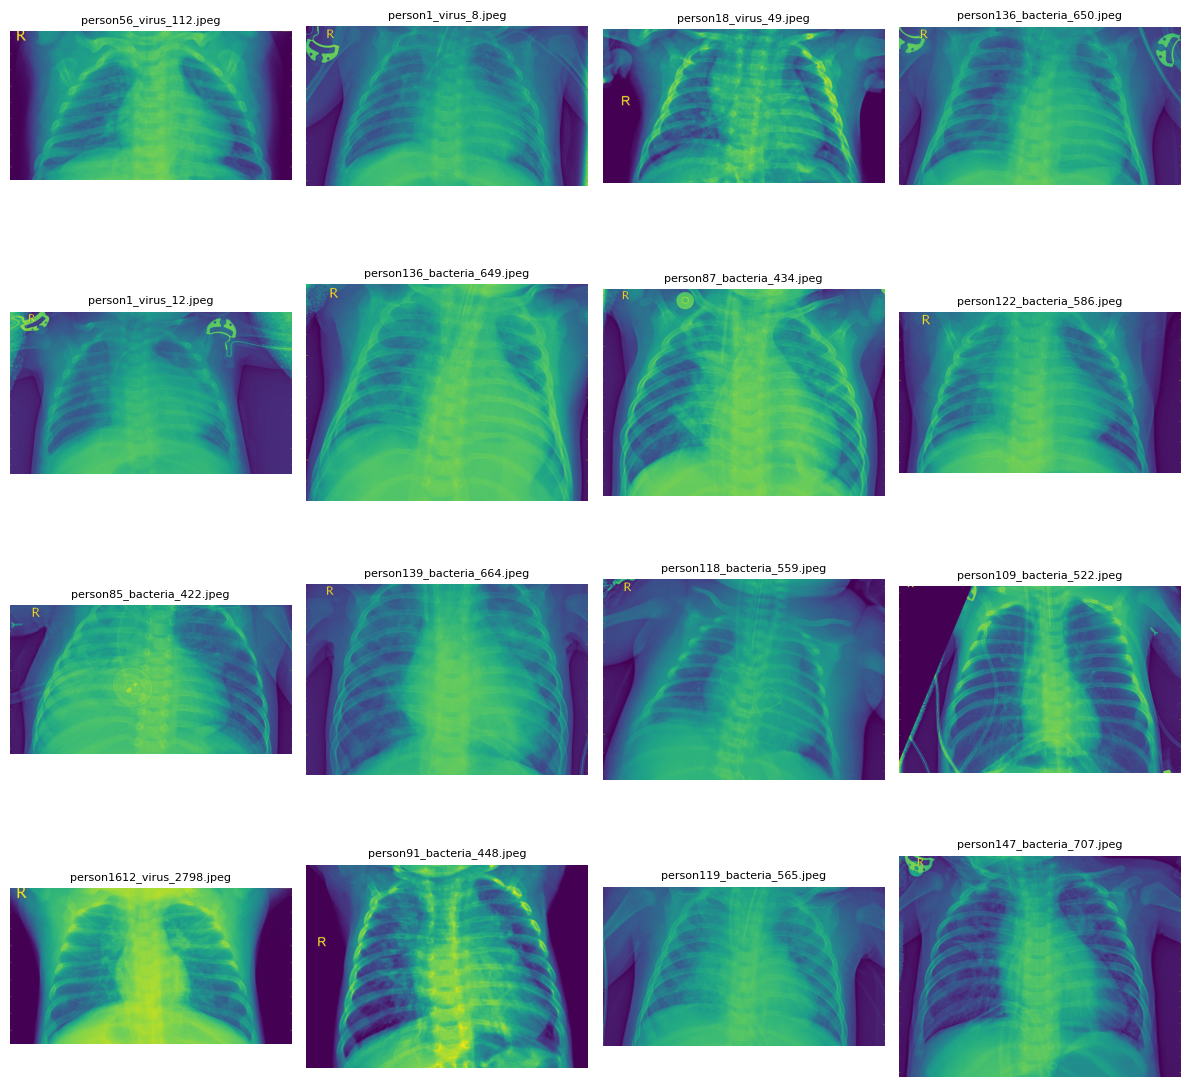

In [ ]:
show_image(test_pne_img, TEST_NORMAL_PATH)

In [31]:
single_image_path = os.path.join(TEST_NORMAL_PATH, test_norm_img[1])
image = Image.open(single_image_path)

### Checking Image Size

In [48]:
test_norm_img

['NORMAL2-IM-0354-0001.jpeg',
 'NORMAL2-IM-0302-0001.jpeg',
 'IM-0086-0001.jpeg',
 'NORMAL2-IM-0277-0001.jpeg',
 'NORMAL2-IM-0303-0001.jpeg',
 'NORMAL2-IM-0275-0001.jpeg',
 'NORMAL2-IM-0364-0001.jpeg',
 'NORMAL2-IM-0283-0001.jpeg',
 'NORMAL2-IM-0335-0001.jpeg',
 'IM-0071-0001.jpeg',
 'NORMAL2-IM-0030-0001.jpeg',
 'IM-0017-0001.jpeg',
 'NORMAL2-IM-0285-0001.jpeg',
 'NORMAL2-IM-0102-0001.jpeg',
 'NORMAL2-IM-0079-0001.jpeg',
 'IM-0105-0001.jpeg',
 'NORMAL2-IM-0033-0001.jpeg',
 'NORMAL2-IM-0327-0001.jpeg',
 'NORMAL2-IM-0339-0001.jpeg',
 'NORMAL2-IM-0013-0001.jpeg',
 'NORMAL2-IM-0201-0001.jpeg',
 'NORMAL2-IM-0213-0001.jpeg',
 'NORMAL2-IM-0131-0001.jpeg',
 'NORMAL2-IM-0246-0001.jpeg',
 'NORMAL2-IM-0278-0001.jpeg',
 'IM-0111-0001.jpeg',
 'IM-0109-0001.jpeg',
 'NORMAL2-IM-0288-0001.jpeg',
 'IM-0084-0001.jpeg',
 'IM-0095-0001.jpeg',
 'IM-0067-0001.jpeg',
 'NORMAL2-IM-0007-0001.jpeg',
 'NORMAL2-IM-0276-0001.jpeg',
 'NORMAL2-IM-0123-0001.jpeg',
 'NORMAL2-IM-0206-0001.jpeg',
 'NORMAL2-IM-0340-0001

In [56]:
def check_img_size(img_lst, folder_path):
    total_width = 0
    total_height = 0
    num_images = len(img_lst)

    for i in range(num_images):
        img_path = os.path.join(folder_path, img_lst[i])
        img = Image.open(img_path)
        width, height = img.size

        total_width += width
        total_height += height
        
    # Computing average
    avg_width = total_width / num_images
    avg_height = total_height / num_images

    print(f"Average width is {avg_width} and Average height is {avg_height}")

    return avg_width, avg_height

test_ni_res = check_img_size(test_norm_img, TEST_NORMAL_PATH)
test_pi_res = check_img_size(test_pne_img, TEST_PNE_PATH)
train_ni_res = check_img_size(train_norm_img, TRAIN_NORMAL_PATH)
train_pi_res = check_img_size(train_pne_img, TRAIN_PNE_PATH)

result_lst = [test_ni_res, test_pi_res, train_ni_res, train_pi_res]

total_h = 0
total_w = 0

for w, h in result_lst:
    total_w += w
    total_h += h

avg_w_h = total_h/4, total_w/4
avg_w_h


Average width is 1800.3034188034187 and Average height is 1369.0897435897436
Average width is 1140.823076923077 and Average height is 765.2897435897436
Average width is 1667.6542473919524 and Average height is 1381.6445603576751
Average width is 1203.5892494929005 and Average height is 831.7043610547668


(1086.9321021479823, 1453.0924981528372)

(1800.3034188034187, 1369.0897435897436)